# **Diabetes Prediction Model using Machine Learning.**

This notebook demonstrates how we can use machine learning to predict whether a person is likely to have diabetes or not, based on certain health parameters. The dataset used is the [PIMA Indian Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) dataset, which includes real-world medical data like glucose level, blood pressure, insulin level, and more.

The aim of this project is to:
- Understand and clean the dataset
- Visualize and analyze feature relationships
- Train a machine learning model
- Evaluate the performance of the model
- Save the trained model for deployment (in a Streamlit app)

In [ ]:
from google.colab import files
uploaded = files.upload()

# **Importing Required Libraries**
- `pandas` and `numpy` for data handling
- `matplotlib` and `seaborn` for visualizations
- `sklearn` for ML model building and evaluation
- `joblib` for saving the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Shape: ", df.shape)

df.info()

df.describe()

cols_with_zero_issue = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(df[cols_with_zero_issue].eq(0).sum())

Shape:  (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


**Data Exploration and Zero-Value Analysis**

We performed an initial exploration of the dataset to understand its structure and identify any potential issues that could affect model performance.

In medical datasets like this one, it's common for some features to contain zero values that are not biologically plausible — for example, a glucose level of 0 or a BMI of 0 is not realistic for a living person. These are likely placeholder values for missing or unrecorded data.

To identify such cases, we checked specific columns where zero values are likely to indicate missing data: Glucose, BloodPressure, SkinThickness, Insulin, and BMI. The output showed that many records in these columns have zero values, with Insulin and SkinThickness being the most affected. This insight is crucial because if we leave these zeros untreated, the machine learning model might interpret them as meaningful, which would skew the predictions and reduce model accuracy. Therefore,we handled these zeroes appropriately during the data cleaning process.

In [ ]:
df[cols_with_zero_issue] = df[cols_with_zero_issue].replace(0, np.nan)

df = df.dropna()

print("After cleaning: ", df.shape)

After cleaning:  (392, 9)


**Handling Missing and Invalid Data**

We focused on data cleaning, particularly dealing with invalid zero values identified in the previous step. To address this, we replaced all zero values in the identified columns with `NaN`. This step ensures that the machine learning algorithms we use later do not treat these zeros as valid input, which could otherwise introduce significant bias or inaccuracies in model training.

In [ ]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

**Separating Features and Target Variable**

Here We prepared the dataset for machine learning by separating it into input features and the target variable. The input features are the health-related measurements such as glucose level, blood pressure, BMI, insulin levels, and others that will be used by the model to learn patterns and make predictions. These were stored in a new variable `x`.

The target variable, stored in `y`, is the Outcome column from the dataset. This column indicates whether a person has diabetes (1) or not (0)


/tmp/ipython-input-7-3527522241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


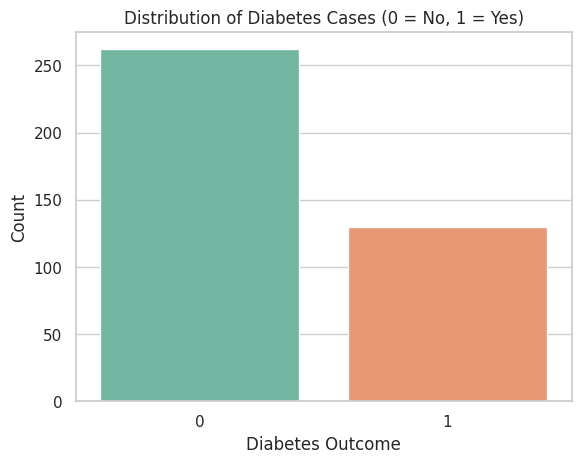

In [ ]:
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title("Distribution of Diabetes Cases (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()


**Visualizing Class Distribution of Diabetes Outcomes**

The above count plot visualizes the distribution of the target variable — the Outcome column — which represents whether an individual is diabetic (1) or non-diabetic (0). This visualization is crucial because it helps us understand how balanced or imbalanced our dataset is in terms of class representation.

The plot shows two bars: one for individuals without diabetes (Outcome = 0) and another for those with diabetes (Outcome = 1). From the graph, we observe that the number of non-diabetic cases is slightly higher than diabetic cases, indicating a **mild class imbalance**. However, the imbalance is not extreme, meaning the dataset is still suitable for training a classification model without requiring advanced resampling techniques.

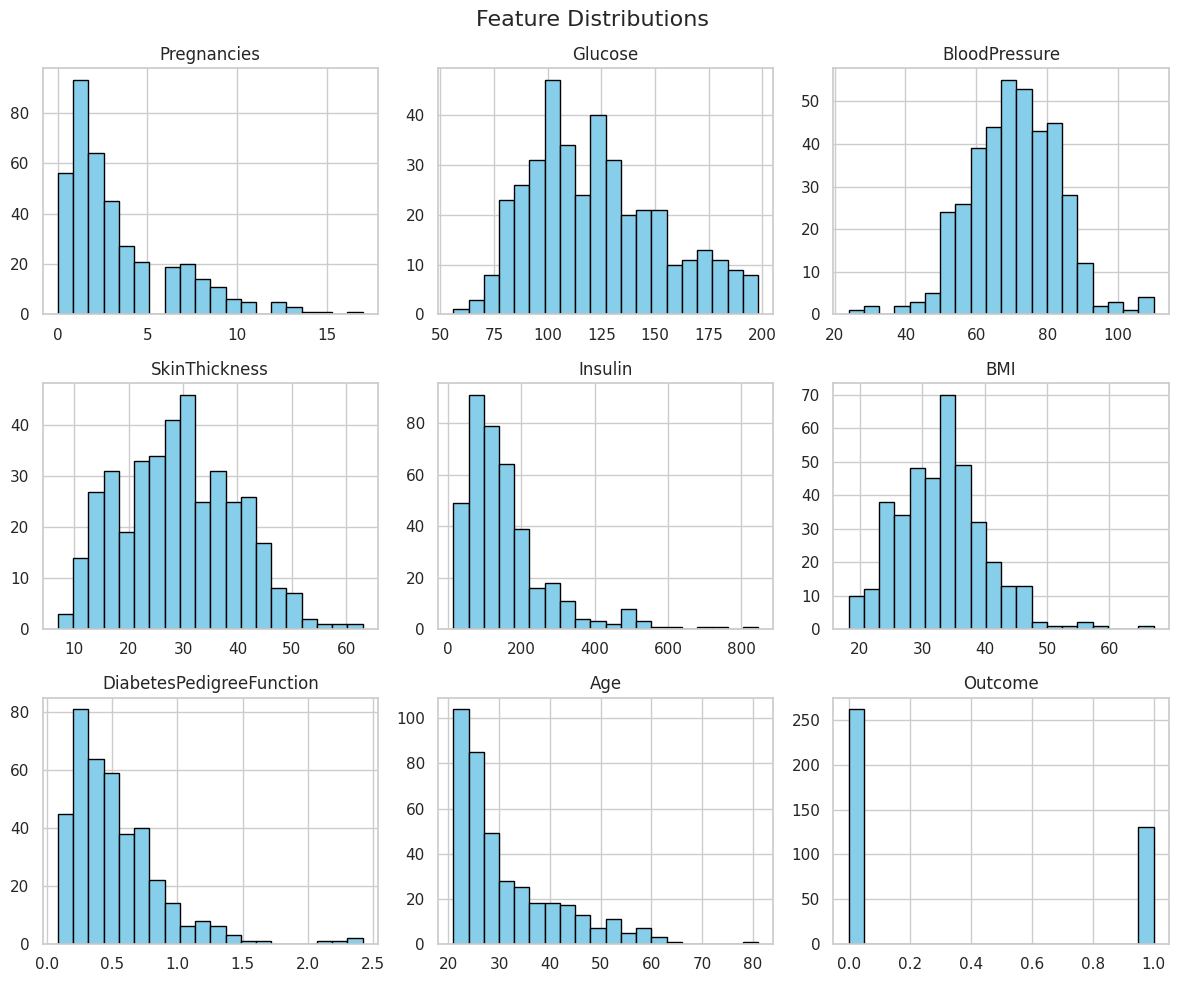

In [ ]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black', color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


**Exploring Feature Distributions Using Histograms**

Her we used histograms to visualize the distribution of each feature in the dataset. Histograms are useful for understanding the range, shape, and frequency of the data values in each column. This allows us to see how values are spread out — whether they're normally distributed, skewed, or have outliers.The histogram plot includes all features except the target.

These visual insights are helpful in deciding whether additional preprocessing (like normalization or log transformation) is needed and also in identifying potential outliers. In our case, it confirms that we handled irregular data well during cleaning and can now proceed confidently with modeling.

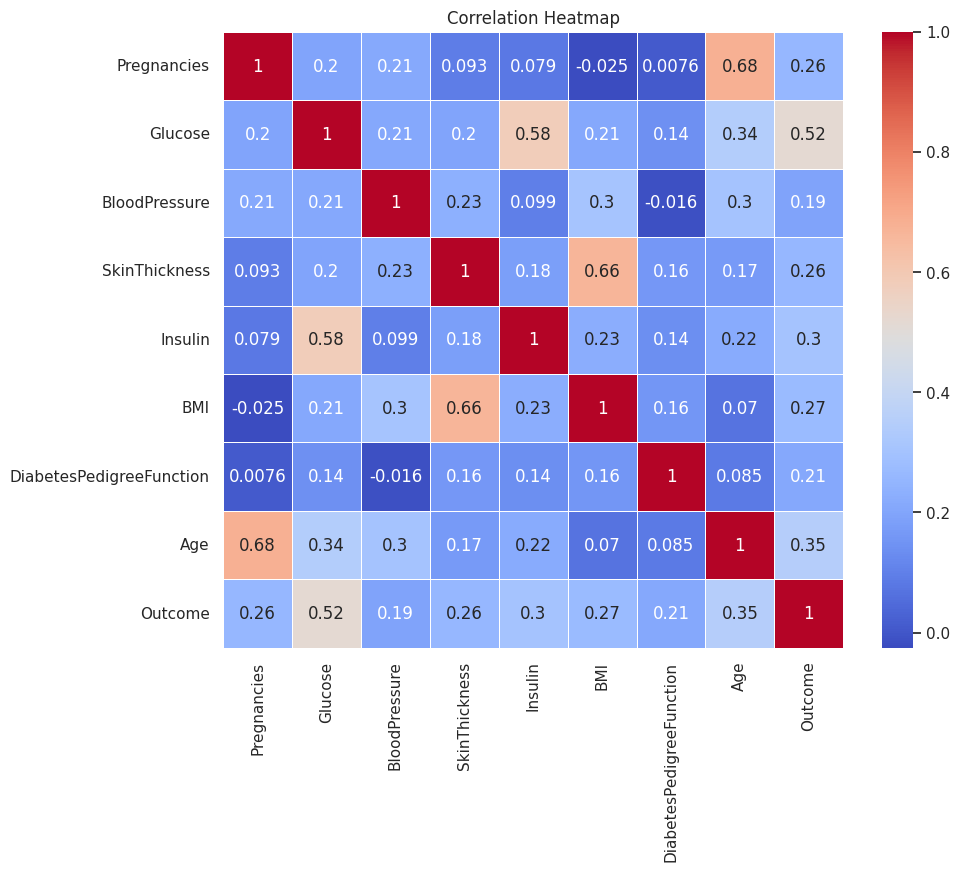

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap**

The correlation heatmap provides a visual representation of how strongly each feature in the dataset is related to the others, including the target variable Outcome.

From the heatmap, we observe that Glucose has the strongest positive correlation with the Outcome, suggesting that higher glucose levels are closely associated with diabetes. Other features like BMI, Age, and DiabetesPedigreeFunction also show moderate positive correlations with the outcome. Features such as SkinThickness and BloodPressure appear to have weaker relationships with diabetes status.

Additionally, there is some correlation among the input features themselves, such as between SkinThickness and BMI, which is expected due to their physiological relationship. Overall, this plot helps us identify the most informative features for predicting diabetes and supports the idea that features like glucose and BMI play a significant role in classification.

/tmp/ipython-input-10-1026735707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set3")


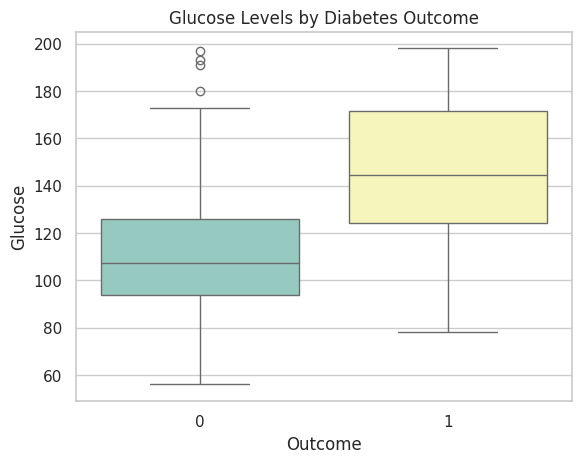

In [ ]:
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set3")
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()


**Interpretation of Glucose Levels by Diabetes Outcome**

This boxplot compares the distribution of glucose levels between individuals with and without diabetes. The x-axis represents the diabetes outcome (0 = non-diabetic, 1 = diabetic), and the y-axis shows the corresponding glucose values.

From the plot, we observe that individuals with diabetes generally have higher glucose levels compared to those without diabetes. The median glucose value is noticeably greater for the diabetic group, and the interquartile range is also shifted upward. Additionally, there are a few outliers in both groups, but the diabetic group clearly trends toward elevated glucose values.

This visualization reinforces the medical understanding that elevated blood glucose is a significant indicator of diabetes. It also highlights glucose as a highly predictive feature, which is consistent with what we saw in the correlation heatmap earlier.

/tmp/ipython-input-11-208632934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="pastel")


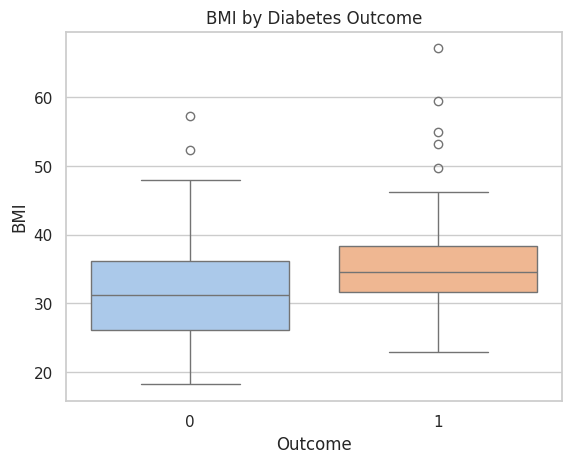

/tmp/ipython-input-11-208632934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="pastel")


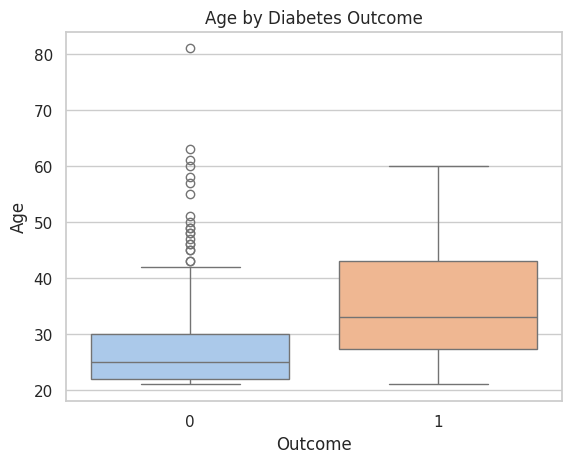

/tmp/ipython-input-11-208632934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="pastel")


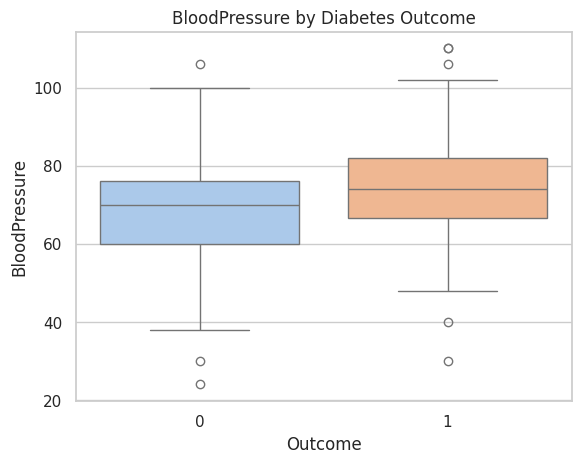

/tmp/ipython-input-11-208632934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=col, data=df, palette="pastel")


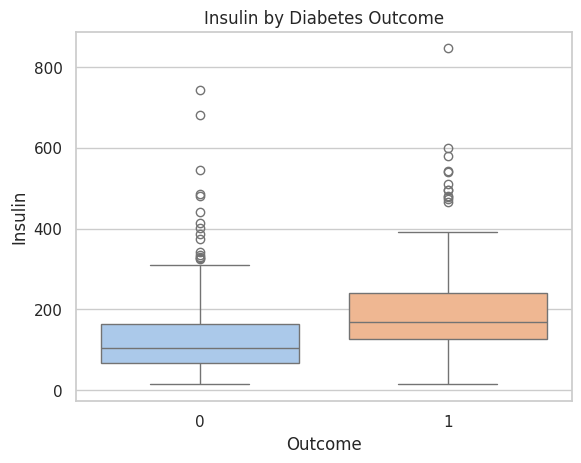

In [ ]:
for col in ['BMI', 'Age', 'BloodPressure', 'Insulin']:
    sns.boxplot(x="Outcome", y=col, data=df, palette="pastel")
    plt.title(f"{col} by Diabetes Outcome")
    plt.show()


**Comparison of Health Features by Diabetes Outcome**

These boxplots display how different health-related features — BMI, Age, Blood Pressure, and Insulin — vary between individuals with and without diabetes. Each plot compares the distribution of values for a specific feature across the two outcome classes.

* **BMI**: The diabetic group tends to have slightly higher BMI values overall.
Although there is some overlap, the median BMI is higher for those diagnosed with diabetes, suggesting that increased body mass may be a contributing factor.

* **Age**: Individuals with diabetes are generally older, with a clear shift in the median age. This aligns with the common observation that the risk of diabetes increases with age.

* **Blood Pressure**: The differences between diabetic and non-diabetic individuals are less pronounced for blood pressure. The medians are relatively close, indicating this feature might have a weaker individual influence on the outcome.

* **Insulin**: The insulin plot shows a wide range of values, with both groups containing several outliers. However, the diabetic group shows more variation and slightly higher insulin levels overall, though this feature alone may not strongly distinguish between the two outcomes.


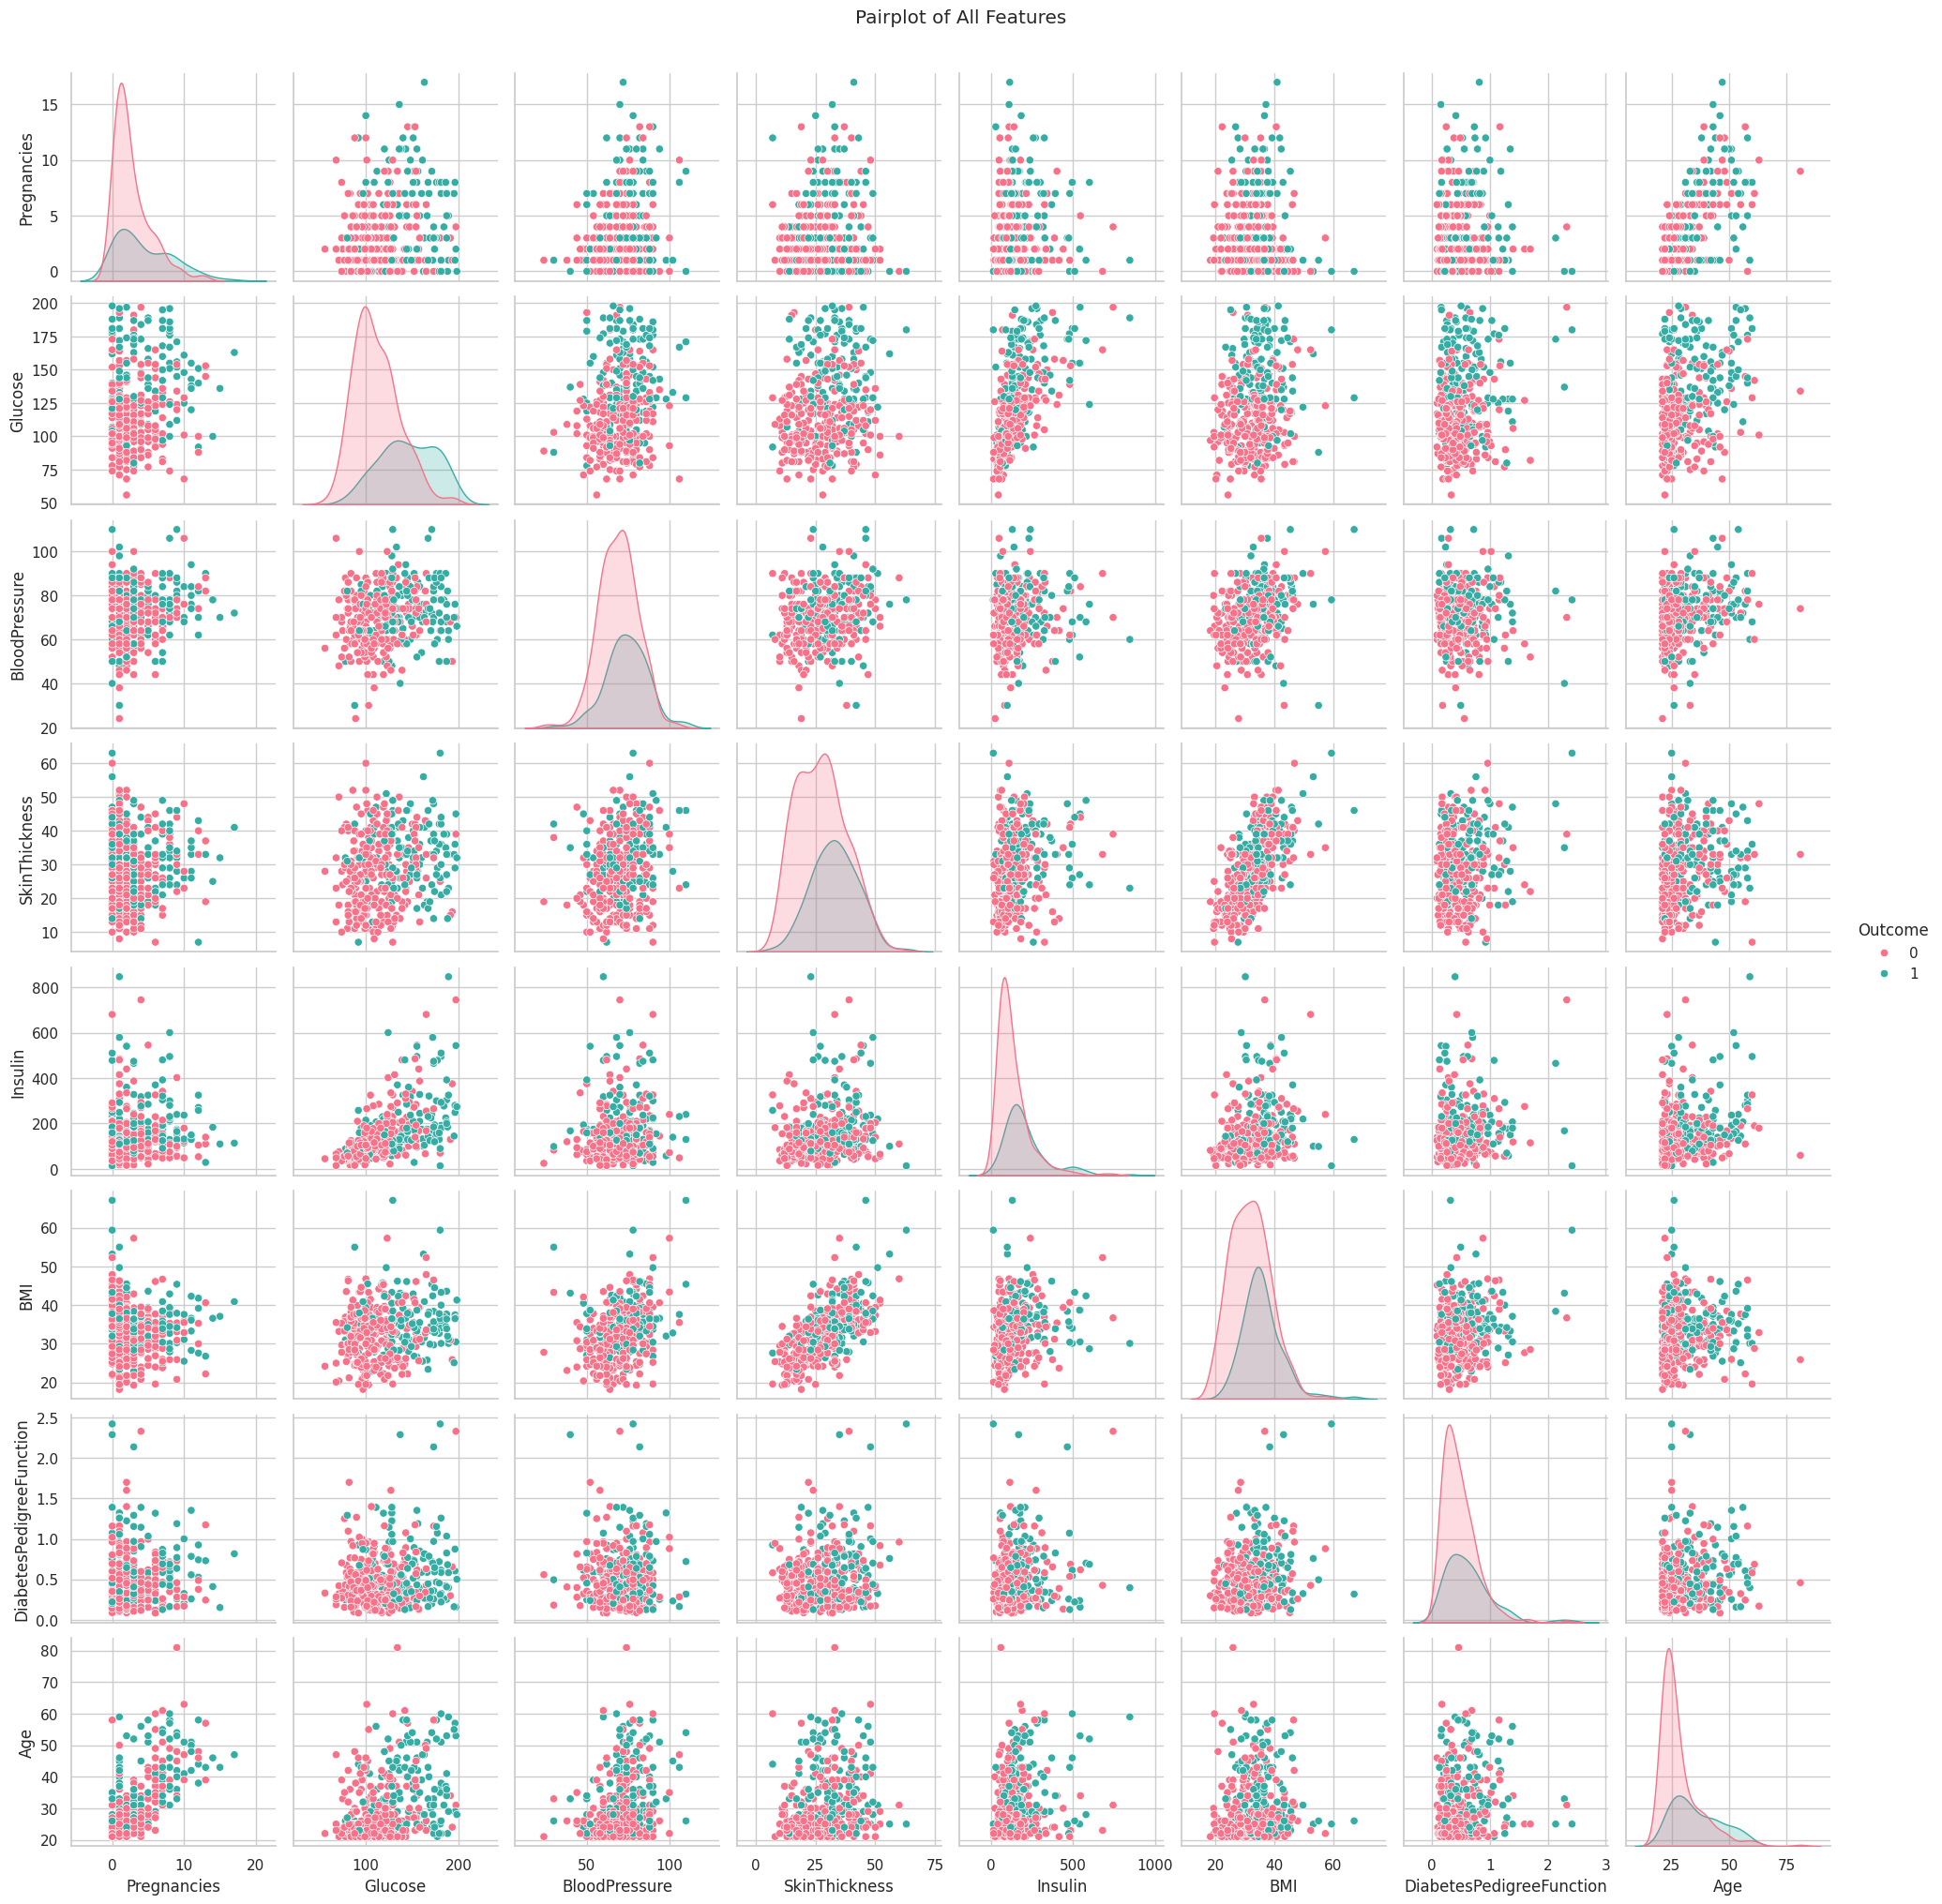

In [ ]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()


The pairplot provides a comprehensive, multi-dimensional view of the relationships between all feature pairs in the dataset, with the data points colored according to the diabetes outcome. It also includes kernel density estimations (KDEs) along the diagonals to show how each individual feature is distributed across the two classes.

From the plot, we observe some key insights:

1. Glucose and BMI show clear separation between diabetic and non-diabetic individuals, with diabetic cases clustering around higher values in these features. This supports earlier observations from boxplots and correlation analysis.

2. Age also shows some distinction, as diabetic individuals tend to fall into older age brackets.

3. SkinThickness and Insulin have overlapping distributions for both classes, which may make them less individually predictive.

4. The scatterplots reveal potential patterns and relationships between features, such as a visible upward trend between BMI and Age, especially among diabetic patients.

Overall, this visualization helps us confirm which features are most useful in differentiating between classes and whether the classes are linearly separable in any feature combinations — insights that are valuable for feature selection and model building.

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


**Feature Scaling with StandardScaler**

We applied feature scaling to the input dataset using `StandardScaler` from Scikit-learn. Feature scaling is an essential preprocessing step in many machine learning workflows, especially when features vary in their units and ranges.

The StandardScaler standardizes the dataset by removing the mean and scaling to unit variance for each feature. This means each column in the dataset will have a mean of 0 and a standard deviation of 1. Scaling ensures that no single feature dominates the model due to its magnitude.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

**Splitting the Dataset into Training and Testing Sets**

We used Scikit-learn's train_test_split() function, specifying test_size=0.2, which means 80% of the data will be used to train the model, and 20% will be used to test its performance. The random_state=42 parameter ensures that the split is reproducible i.e. every time we run the code, the same data points will be assigned to the training and testing sets.

This split allows us to train the model on one portion of the data and then evaluate how well it performs on new, unseen data — simulating how it would perform in real-world scenarios. A well-performing model should achieve good accuracy on the test set without being overfitted to the training data.

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

**Training the Random Forest Classifier**

We initialized and trained a Random Forest Classifier using the training data. *Random Forest* is an ensemble learning method that constructs a large number of individual decision trees during training and outputs the class that is the majority vote among the trees.

This model is particularly effective for classification problems like this one, as it handles both non-linear relationships and noisy data well. It also reduces the risk of overfitting that is common with single decision trees by averaging the results across multiple trees.

By fitting the model on x_train and y_train, we allow it to learn patterns and relationships between the health parameters and the diabetes outcome. Once trained, this model will be used to predict outcomes on unseen test data and eventually be saved for deployment in a user-facing application.

In [ ]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.759493670886076

Confusion Matrix:
 [[45  7]
 [12 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.68      0.56      0.61        27

    accuracy                           0.76        79
   macro avg       0.74      0.71      0.72        79
weighted avg       0.75      0.76      0.75        79



**Model Evaluation and Interpretation of Results**

On evaluating the performance of the model on the test set using several important metrics: accuracy, confusion matrix, and a detailed classification report that includes precision, recall, and F1-score for each class.

* **Accuracy**: The model achieved an overall accuracy of 75.95%, which means that approximately 76% of the predictions made on the test set were correct. While this is a reasonably good result, accuracy alone does not provide the full picture, especially in classification problems with class imbalance.

* **Confusion Matrix**: This tells us that while the model performs well in identifying non-diabetic cases, it misses some actual diabetic cases, which could be critical in a real-world medical setting.


Hence, The model is better at predicting non-diabetic cases than diabetic ones.
It struggles more with recall on diabetic cases, meaning it misses a fair number of actual diabetics — a potential problem in real healthcare scenarios where false negatives could have serious consequences.
This behavior is typical in slightly imbalanced datasets, and it could be improved by:
1. Using more data
2. Applying oversampling techniques like SMOTE
3. Using a more optimized model with hyperparameter tuning

In [ ]:
import joblib

joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Here we saved both the trained machine learning model and the fitted scaler using the `joblib` library.

The trained model (diabetes_model.pkl) contains the logic and parameters that the algorithm has learned from the training data. The scaler (scaler.pkl) ensures that any new input data will be standardized in exactly the same way as the training data, which is essential for consistent and accurate predictions.

By saving these components as .pkl files, it is possible to reuse the trained model and scaler without retraining them every time. These files can be loaded into any Python application to make predictions on new user input.

In [ ]:
from google.colab import files
files.download('diabetes_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading the model and scaler files from Colab module to download the saved model and scaler files from the Colab environment to our local system.

# **Conclusion**

In this project, we successfully built a machine learning model to predict the likelihood of diabetes in patients using the PIMA Indian Diabetes dataset. The process involved several key stages, including data cleaning, exploratory data analysis, feature scaling, model training, evaluation, and saving the trained model for deployment.

 We trained a Random Forest Classifier — a robust and reliable algorithm for structured data, and achieved a respectable accuracy of approximately *76%*.

Overall, this project served as a complete end-to-end implementation of a predictive analytics system, from raw data to deployable model — highlighting the power of data science and machine learning in solving real-world problems.